# Figure 2: Performance metrics

**Figure 2:** Performance metrics for SCCS analyses. To evaluate the performance of the models we used all drug-event pairs to calculate the AUROC, but only negative controls to measure the bias, coverage and mean squared error (MSE). For NYP data (red), we see a significant increase in coverage and decrease in bias and no change in AUROC or MSE when the utilization score is included in the model (dark red). We observe a similar trend with the MarketScan data (blue) although not as pronounced. We investigate four adverse events: acute kidney injury (AKI), acute liver injury (ALI), acute myocardial infarction (AMI), and gastrointestinal bleed (GIB), using NYP EHR data (NYP) and MarketScan Multi-state Medicaid (MDCD), MarketScan Medicare Supplemental Beneficiaries (MDCR), and MarketScan Commercial Claims and Encounters (CCAE). Note that graphs are truncated to relevant ranges.

Results stored in file `perf_metrics_20220117.csv`

- NYP is in red
- CCAE, MDCD and MDCR are in blue and fainter outlines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
perf = pd.read_csv('data/perf_metrics_20220117.csv')
perf.head()

,id,model,condition_name,n,dataset,measure,val
0,Bootstrap0001,W/O Score,AKI,64,MDCD,Bias,0.722884
1,Bootstrap0001,W/O Score,AKI,64,MDCD,MSE,6.526373
2,Bootstrap0001,W/O Score,AKI,64,MDCD,Coverage,0.312500
3,Bootstrap0001,W/O Score,AKI,64,MDCD,AUROC,0.495280
4,Bootstrap0001,W/O Score,ALI,72,MDCD,Bias,0.482431


In [4]:
from matplotlib.path import Path
from matplotlib.patches import BoxStyle


class ExtendedTextBox(BoxStyle._Base):
    """
    An Extended Text Box that expands to the axes limits 
                        if set in the middle of the axes
    """

    def __init__(self, pad=0.3, width=500.):
        """
        width: 
            width of the textbox. 
            Use `ax.get_window_extent().width` 
                   to get the width of the axes.
        pad: 
            amount of padding (in vertical direction only)
        """
        self.width=width
        self.pad = pad
        super(ExtendedTextBox, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        x0 and y0 are the lower left corner of original text box
        They are set automatically by matplotlib
        """
        # padding
        pad = mutation_size * self.pad

        # we add the padding only to the box height
        height = height + 2.*pad
        # boundary of the padded box
        y0 = y0 - pad
        y1 = y0 + height
        _x0 = x0
        x0 = _x0 +width /2. - self.width/2.
        x1 = _x0 +width /2. + self.width/2.

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path


# register the custom style
BoxStyle._style_list["ext"] = ExtendedTextBox

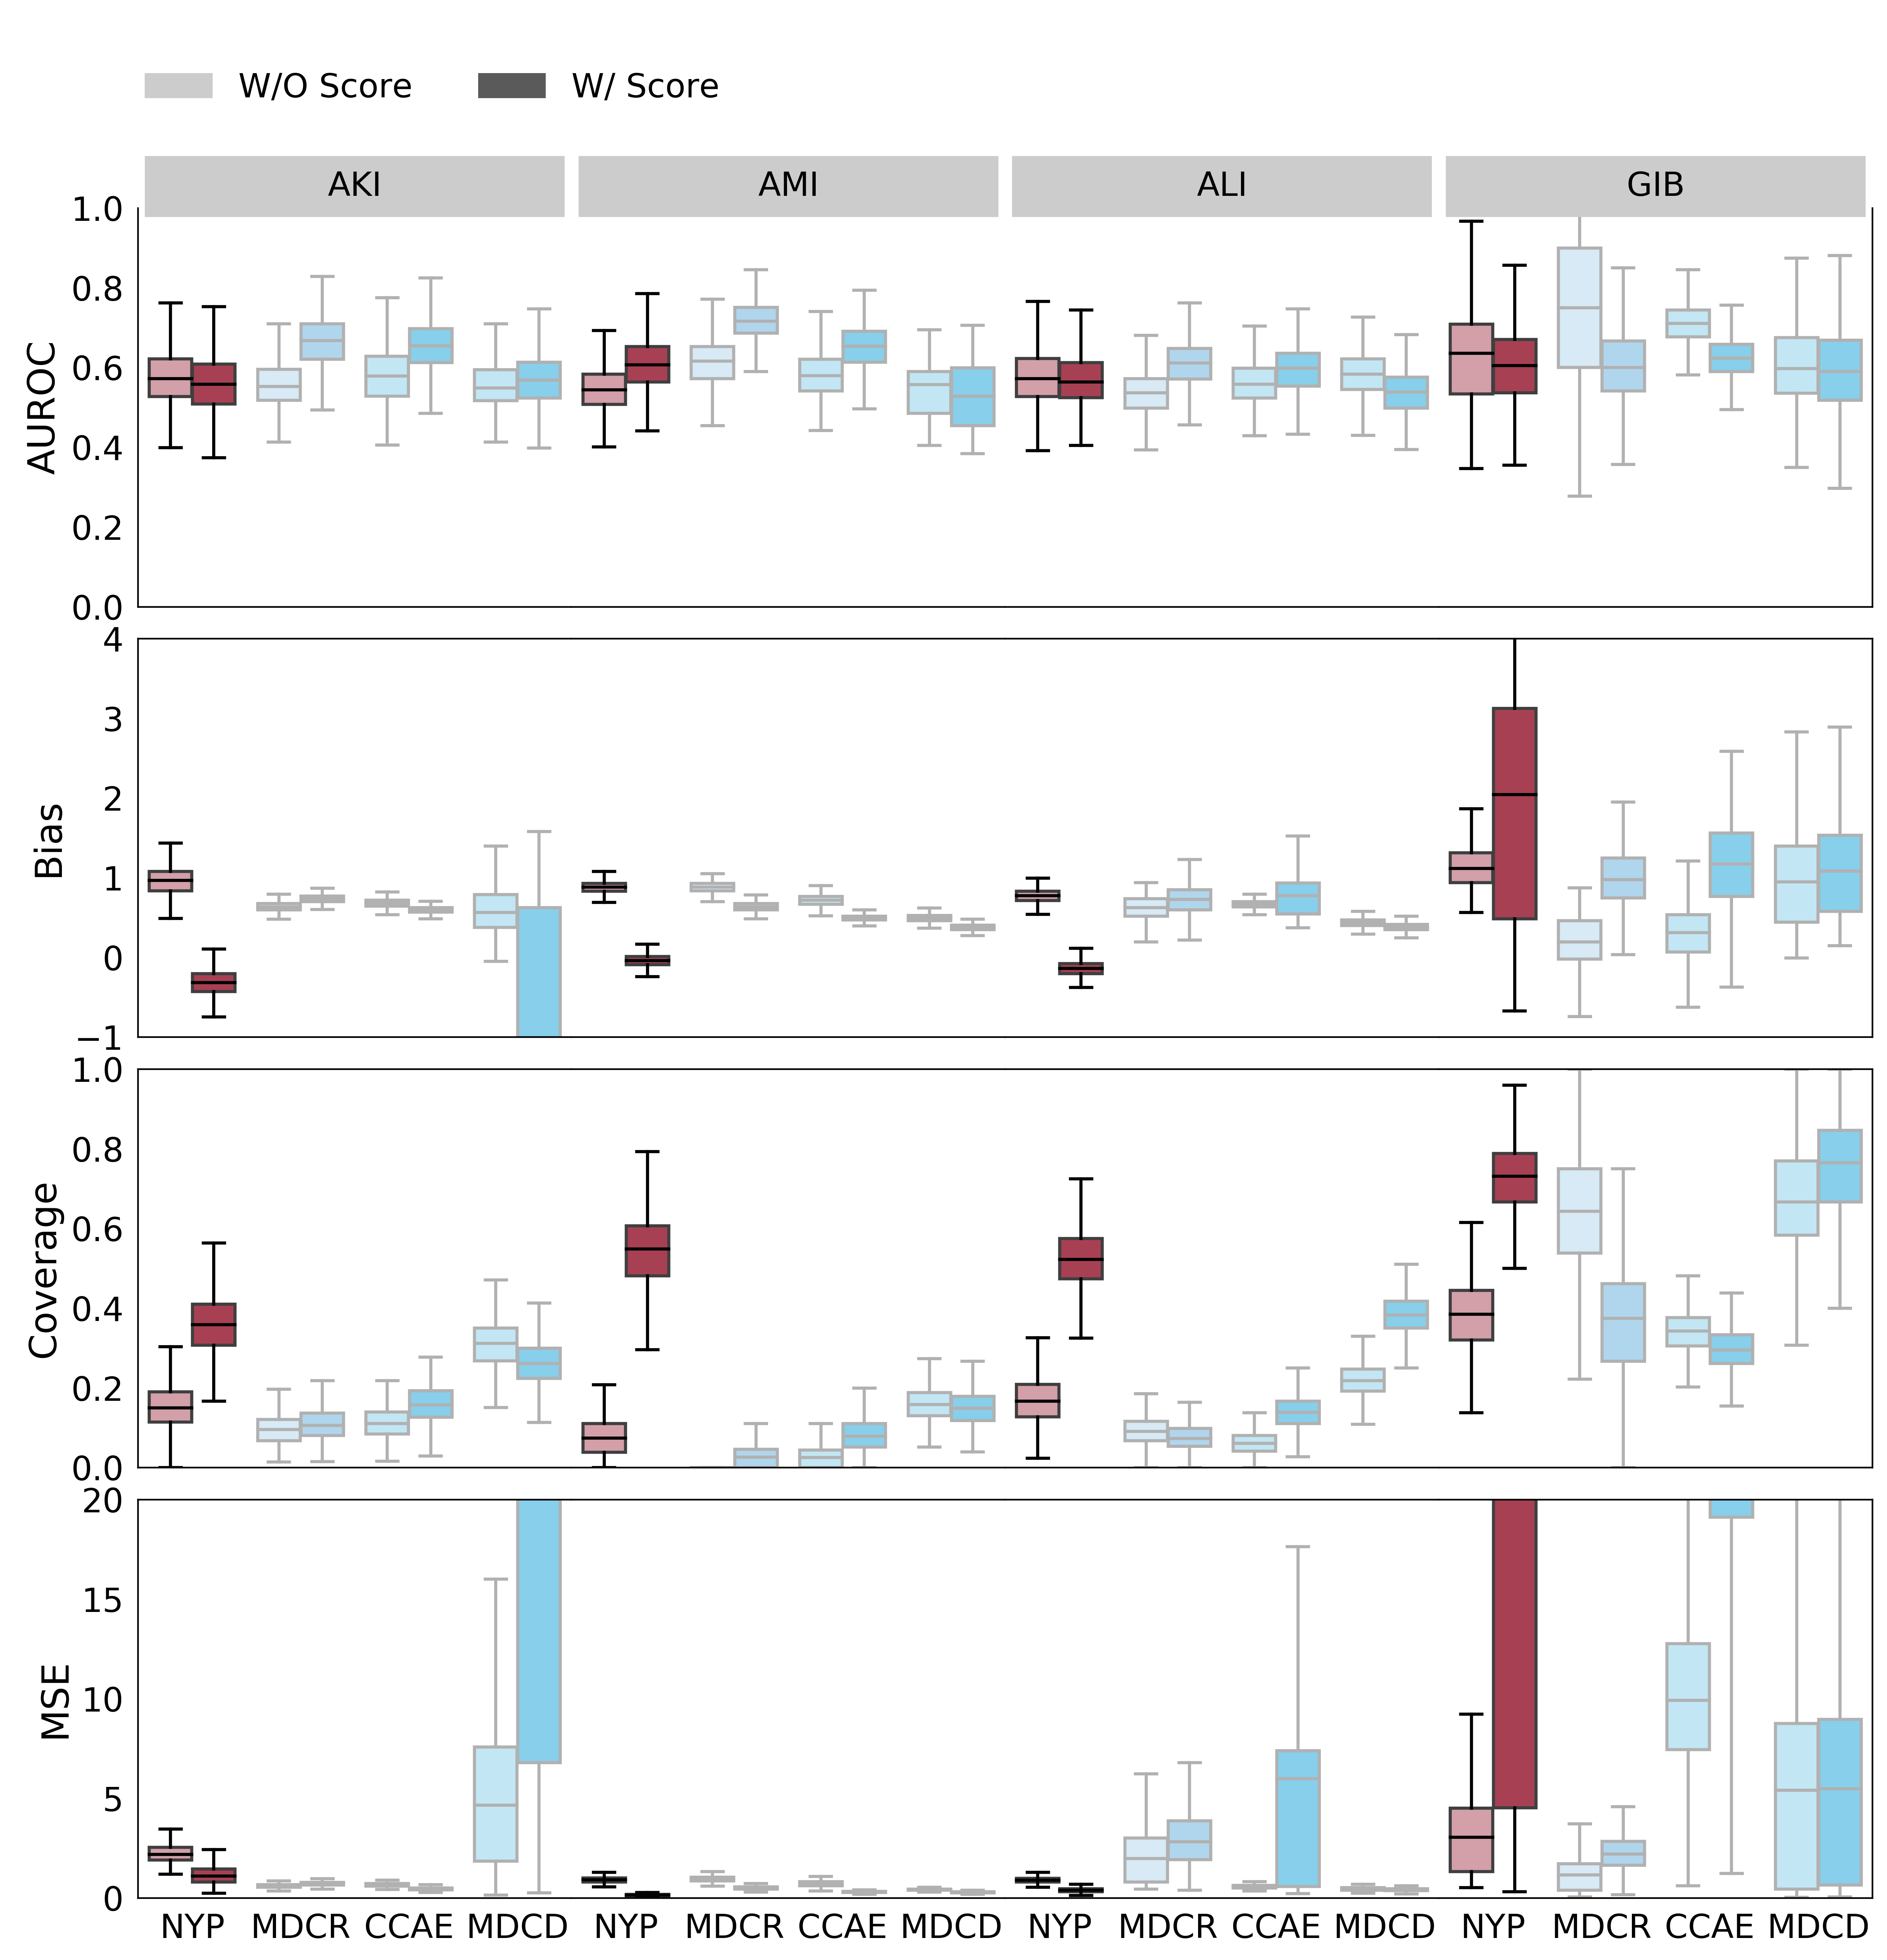

In [5]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.rcParams['figure.figsize'] = [15, 15]
fig, axes = plt.subplots(4,4, sharex='col', sharey='row', dpi = 400)
palette = {'NYP': '#AA4A44', 'MDCR': '#6699CC', 'CCAE': '#6699CC', 'MDCD': '#6699CC'}
i = 0
j = 0
col = 'k'
for condition in ['AKI', 'ALI', 'AMI', 'GIB']:
    for metric in ['AUROC', 'Bias', 'Coverage', 'MSE']:
        ax = sns.boxplot(
            data = perf[(perf['measure'] == metric) & (perf['condition_name']==condition)],
            x='dataset', y='val', hue = 'model',
            showfliers = False, order=['NYP', 'MDCR', 'CCAE', 'MDCD'],
            ax=axes[j, i])
        ax.get_legend().remove()
        if metric == 'AUROC':
            ax.set_ylim(0, 1)
        if metric == 'Bias':
            ax.set_ylim(-1, 4)
        if metric == 'Coverage':
            ax.set_ylim(0, 1)
        if metric == 'MSE':
            ax.set_ylim(0, 20)
            
        ax.artists[0].set(facecolor = (0.66,0.25,0.33,0.5))
        ax.artists[1].set(facecolor = (0.66,0.25,0.33,1))
        ax.artists[2].set_facecolor((0.69,0.84,0.93,0.5))
        ax.artists[3].set_facecolor((0.69,0.84,0.93,1))
        ax.artists[4].set_facecolor((0.53,0.81,0.92,0.5))
        ax.artists[5].set_facecolor((0.53,0.81,0.92,1))
        ax.artists[6].set_facecolor((0.53,0.81,0.92,0.5))
        ax.artists[7].set_facecolor((0.53,0.81,0.92,1))       
        
        for a,box in enumerate(ax.artists):
            if a in [2,3,4,5,6,7]:
                box.set_edgecolor('#B1B1B1')
                box.set()
            # iterate over whiskers and median lines
            for b in range(6*a,6*(a+1)):
                if b > 39:
                    break
                if b < 10:
                    ax.lines[b].set_color('k')
                else:
                    ax.lines[b].set_color('#B1B1B1')

        j += 1
    i +=1
    j = 0

Nrows = 4
Ncols = 4
title = axes[0, 0].set_title("AKI", backgroundcolor = '#CCCCCC')
bb = title.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.4, width=2.8 * fig.dpi)
title = axes[0, 1].set_title("AMI", backgroundcolor = '#CCCCCC')
bb = title.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.4, width=2.8 * 400)
title = axes[0, 2].set_title("ALI", backgroundcolor = '#CCCCCC')
bb = title.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.4, width=2.8 * 400)
title = axes[0, 3].set_title("GIB", backgroundcolor = '#CCCCCC')
bb = title.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.4, width=2.8 * 400)

for i in range(Nrows):
    for j in range(Ncols):
        axes[i,j].yaxis.set_ticks_position('none')
        axes[i,j].xaxis.set_ticks_position('none')
        axes[i,j].set(xlabel=None)
        
        if i == 0:
            axes[i,j].set(ylabel='AUROC')
        elif i == 1:
            axes[i,j].set(ylabel='Bias')
        elif i == 2:
            axes[i,j].set(ylabel='Coverage')
        elif i == 3:
            axes[i,j].set(ylabel='MSE')

        
        if j != 0:
            axes[i,j].set(ylabel=None)
            if i != (Nrows-1):
                axes[i,j].spines['left'].set_visible(False)
                axes[i,j].spines['right'].set_visible(False)
                axes[i,j].spines['top'].set_visible(True)
            else:
                axes[i,j].spines['left'].set_visible(False)
                axes[i,j].spines['right'].set_visible(False)
                axes[i,j].spines['top'].set_visible(True)
        else:
            axes[i,j].spines['top'].set_visible(True)
            axes[i,j].spines['right'].set_visible(False)
            
        if j == 3:
            axes[i,j].spines['right'].set_visible(True)

        if i == 0:
            axes[i,j].spines['top'].set_visible(False)


handles, labels = ax.get_legend_handles_labels()
handles[0].set_color('#CCCCCC')
handles[1].set_color('#5A5A5A')
fig.legend(handles,
           labels,
           loc=[0.07, 0.94],
           ncol = 2,
           frameon = False)


plt.subplots_adjust(wspace=0.0, hspace=0.08)
plt.savefig('20230123_Figure2_performanceSCCS.png', dpi=400, bbox_inches='tight', pad_inches=0, format="png")
plt.show()